<a href="https://colab.research.google.com/github/XingxinHE/Kaggle_Practice/blob/master/Cat_and_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os, shutil
os.chdir("/content/gdrive/My Drive/Kaggle/Cat and Dog")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
ls

'Cat and Dog.ipynb'   original_data/   small_data/


# 取2000份为小数据集

这一level一旦run 完，后续不用再来。因为这只是为我在Google drive上组织文件及分类图片路径

## 整理路径

In [10]:
original_dataset_dir = '/content/gdrive/My Drive/Kaggle/Cat and Dog/original_data/train' #因为这是kaggle的数据集，test是交答案的，我这里只是在full train dataset里找狗猫分别2000来练习
base_dir = '/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data'

In [5]:
#Create train dir for small data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [6]:
#Create validation dir for small data
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [7]:
#Create test dir for small data
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [8]:
#Cats and dogs dir in train dir
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)



#Cats and dogs dir in validation dir
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)



#Cats and dogs dir in test dir
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

## 复制粘贴猫图片为训练，验证，测试集

### Copies the first 1,000 cat images to train_cats_dir

In [11]:
#file names
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(train_cats_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

### Copies the next 500 cat images to validation_cats_dir

In [12]:
#file names
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(validation_cats_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

### Copies the next 500 cat images to test_cats_dir

In [13]:
#file names
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(test_cats_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

## 复制粘贴狗的训练，验证，测试集

### Copies the first 1,000 dog images to train_dogs_dir

In [14]:
#file names
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(train_dogs_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

### Copies the next 500 dog images to validation_dogs_dir

In [15]:
#file names
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(validation_dogs_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

### Copies the next 500 dog images to test_dogs_dir

In [16]:
#file names
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) #source path
  dst = os.path.join(test_dogs_dir, fname) #destination path
  shutil.copyfile(src, dst) #copy and paste

## Check一下各个路径的文件

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 搭建模型

### Set up

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import optimizers

## Build Neural Network

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Inspect the Model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compile the model

In [22]:
model.compile(loss='binary_crossentropy',
       optimizer = optimizers.RMSprop(lr=1e-4),
       metrics=['acc'])

# 数据预处理

现在在路径里面的文件都是图片格式，要把它转成数字才可以被训练

1. 读取图片

2. 将JPEG变成RGB三通道

3. 转成浮点tensor

4. 从0-255变成0-1

Keras拥有上述功能，很方便！

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
#转成0-1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #目标路径
    target_size=(150,150), #缩小至150*150
    batch_size=20,
    class_mode='binary' #因为我们的损失函数是binary_crossentropy
)

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = train_datagen.flow_from_directory(
    validation_dir, #目标路径
    target_size=(150,150), #缩小至150*150
    batch_size=20,
    class_mode='binary' #因为我们的损失函数是binary_crossentropy
)

Found 1000 images belonging to 2 classes.


# 路径合集

因为我用的是Google colab，前面的路径是只要一创建就有了，但是这个变量每次重启notebook就会丢失，所以我是打出，然后再hard-code他们

In [28]:
train_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/train'

In [29]:
validation_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/validation'

In [30]:
test_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/test'

In [32]:
train_cats_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/train/cats'

In [33]:
train_dogs_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/train/dogs'

In [34]:
validation_cats_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/validation/cats'

In [35]:
validation_dogs_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/validation/dogs'

In [36]:
test_cats_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/test/cats'

In [37]:
test_dogs_dir

'/content/gdrive/My Drive/Kaggle/Cat and Dog/small_data/test/dogs'

# 训练模型

In [31]:
history = model.fit_generator( 
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6929 - acc: 0.5375 - val_loss: 0.6713 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6550 - acc: 0.6035 - val_loss: 0.6265 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 15s 151ms/step - loss: 0.5989 - acc: 0.6845 - val_loss: 0.6032 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5592 - acc: 0.7165 - val_loss: 0.5903 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 15s 147ms/step - loss: 0.5300 - acc: 0.7325 - val_loss: 0.8023 - val_acc: 0.5600
Epoch 6/30
100/100 [==============================] - 15s 145ms/step - loss: 0.5073 - acc: 0.7425 - val_loss: 0.6163 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 15s 146ms/step - loss: 0.4779 - acc: 0.7655 - val_loss: 0.68

# 保存模型

In [38]:
model.save('cats_and_dogs_small_1.h5')

# 查看模型表现

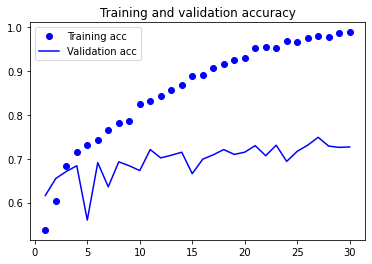

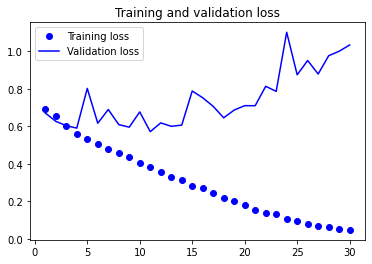

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()